The *apriori step size control* determines the step size based on the location of the nearest pole and the curvature.  This notebook not only shows the (real parts of the) paths, but also shows the location of the nearest poles.

In [1]:
import matplotlib.pyplot as plt

In [2]:
from phcpy.dimension import set_seed, get_seed
from phcpy.solutions import strsol2dict
from phcpy.starters import total_degree_start_system
from phcpy.curves import set_default_parameters, write_parameters
from phcpy.curves import initialize_double_artificial_homotopy
from phcpy.curves import set_double_solution, get_double_solution
from phcpy.curves import double_predict_correct
from phcpy.curves import double_t_value, double_closest_pole

PHCv2.4.88 released 2023-12-26 works!


In [3]:
set_seed(12871)
print('the seed :', get_seed())

the seed : 12871


In [4]:
p = ['x^2 + y - 3;', 'x + 0.125*y^2 - 1.5;']

In [5]:
q, qsols = total_degree_start_system(p)
for pol in q:
    print(pol)

x^2 - 1;
y^2 - 1;


In [6]:
print('number of start solutions :', len(qsols))

number of start solutions : 4


In [7]:
set_default_parameters()
write_parameters()

Values of the HOMOTOPY CONTINUATION PARAMETERS :
 1. gamma : (-0.8063005962200716-0.5915060004219376j)
 2. degree of numerator of Pade approximant    : 5
 3. degree of denominator of Pade approximant  : 1
 4. maximum step size                          : 0.1
 5. minimum step size                          : 1e-06
 6. multiplication factor for the pole radius  : 0.5
 7. multiplication factor for the curvature    : 0.005
 8. tolerance on the residual of the predictor : 0.001
 9. tolerance on the residual of the corrector : 1e-08
10. tolerance on zero series coefficients      : 1e-12
11. maximum number of corrector steps          : 4
12. maximum steps on a path                    : 1000


In [8]:
initialize_double_artificial_homotopy(p, q, False)

0

t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x :  1.00000458683462E+00   7.95321001653953E-06
 y :  1.99999082635867E+00  -1.59064683422953E-05
== err :  1.458E-05 = rco :  3.155E-12 = res :  1.529E-12 =
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x :  9.99999434968695E-01   9.78667863138325E-07
 y :  2.00000113004483E+00  -1.95736651949408E-06
== err :  1.658E-05 = rco :  6.664E-12 = res :  1.976E-12 =
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x :  1.00000600449478E+00   2.32224203692682E-07
 y :  1.99998799104108E+00  -4.64448075210226E-07
== err :  1.671E-05 = rco :  9.377E-13 = res :  3.579E-12 =
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x : -3.00000000000000E+00   0.00000000000000E+00
 y : -6.00000000000000E+00   0.00000000000000E+00
== err :  5.551E-16 = rco :  1.965E-01 = res :  0.000E+00 =


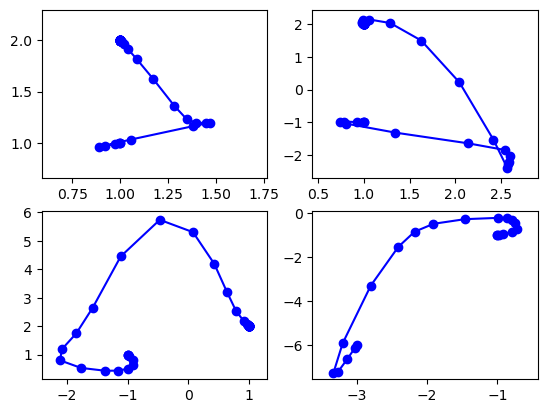

In [9]:
plt.ion()
fig1 = plt.figure()
allpoles = []
for k in range(len(qsols)):
    if(k == 0):
        axs = fig1.add_subplot(221)
    elif(k == 1):
        axs = fig1.add_subplot(222)
    elif(k == 2):
        axs = fig1.add_subplot(223)
    elif(k == 3):
        axs = fig1.add_subplot(224)
    startsol = qsols[k]
    set_double_solution(len(p), startsol)
    dictsol = strsol2dict(startsol)
    xpoints =  [dictsol['x']]
    ypoints =  [dictsol['y']]
    poles = []
    for k in range(100):
        ns = get_double_solution()
        dictsol = strsol2dict(ns)
        xpoints.append(dictsol['x'])
        ypoints.append(dictsol['y'])
        tval = dictsol['t'].real
        if(tval == 1.0):
            break
        double_predict_correct()
        pole = double_closest_pole()
        tval = double_t_value()
        locp = (tval+pole[0], pole[1])
        poles.append(locp)
    print(ns)
    xre = [point.real for point in xpoints]
    yre = [point.real for point in ypoints]
    axs.set_xlim(min(xre)-0.3, max(xre)+0.3)
    axs.set_ylim(min(yre)-0.3, max(yre)+0.3)
    dots, = axs.plot(xre,yre,'b-')
    dots, = axs.plot(xre,yre,'bo')
    fig1.canvas.draw()
    allpoles.append(poles)
fig1.canvas.draw()
plt.savefig('showpolesfig1')

The poles are shown in the next figure.

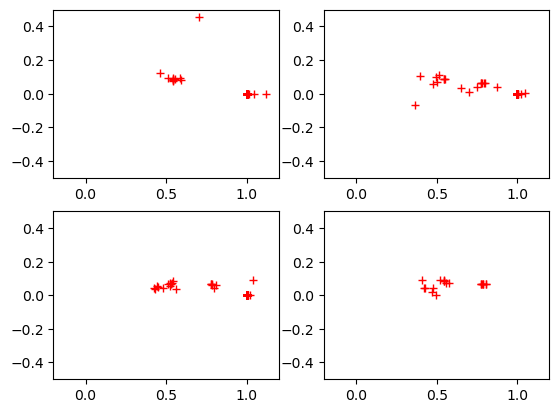

In [10]:
fig2 = plt.figure()
for k in range(len(qsols)):
    if(k == 0):
        axs = fig2.add_subplot(221)
    elif(k == 1):
        axs = fig2.add_subplot(222)
    elif(k == 2):
        axs = fig2.add_subplot(223)
    elif(k == 3):
        axs = fig2.add_subplot(224)
    poles = allpoles[k]
    pl0 = [pole[0] for pole in poles]
    pl1 = [pole[1] for pole in poles]
    axs.set_xlim(-0.2, 1.2)
    axs.set_ylim(-0.5, 0.5)
    dots, = axs.plot(pl0,pl1,'r+')
    fig2.canvas.draw()
fig2.canvas.draw()
plt.savefig('showpolesfig2')

Observe that for this example, more poles are located closer to the middle and the end of the paths.